# Predicting Black Friday Sales

# Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

# Loading Data

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.shape

(550068, 12)

In [4]:
df_test.shape

(233599, 11)

In [5]:
df_test.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN


In [6]:
df_Answer=df_test[['User_ID','Product_ID']]
df_Answer.to_csv('Result.csv')
df_Answer.to_csv('Result.csv',index=False)#removing index
df_Answer=pd.read_csv('Result.csv')
df_Answer.head(2)

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442


In [7]:
df_train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


Checking for null values

In [8]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

# cleaning data

In [10]:
# df['col'] = df['Product_ID'].astype(str)
# df['ID']=df['Product_ID'].str[3:9]
# df=df.drop(['col','Product_ID'],axis='columns')
# df['ID']=pd.to_numeric(df['ID'],errors='coerce')
# df['ID'].value_counts()

In [11]:
df_train=df_train.drop(["User_ID","Product_Category_3","Product_ID"],axis='columns')
df_test=df_test.drop(["User_ID","Product_Category_3","Product_ID"],axis='columns')

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 37.8+ MB


In [13]:
p1=df_train['Product_Category_2'].mode()
p2=df_test['Product_Category_2'].mode()
print(p1)
print(p2)

0    8.0
dtype: float64
0    8.0
dtype: float64


In [14]:
df_train['Product_Category_2'].fillna(value=8.0,inplace=True)
df_test['Product_Category_2'].fillna(value=8.0,inplace=True)

In [15]:
df_train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [16]:
df_train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [17]:
df_train['Age']=df_train['Age'].str.strip('+')
df_test['Age']=df_test['Age'].str.strip('+')
df_train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55        21504
0-17      15102
Name: Age, dtype: int64

In [18]:
df_train['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [19]:
df_train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [20]:
df_train['Stay_In_Current_City_Years']=df_train['Stay_In_Current_City_Years'].str.strip('+')
df_train['Stay_In_Current_City_Years']=pd.to_numeric(df_train['Stay_In_Current_City_Years'],errors='coerce')

df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].str.strip('+')
df_test['Stay_In_Current_City_Years']=pd.to_numeric(df_test['Stay_In_Current_City_Years'],errors='coerce')

df_train['Stay_In_Current_City_Years'].value_counts()

1    193821
2    101838
3     95285
4     84726
0     74398
Name: Stay_In_Current_City_Years, dtype: int64

# Count Graphs

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 37.8+ MB


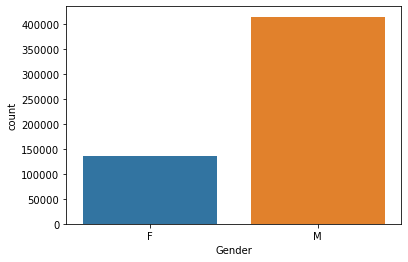

In [22]:
sns.countplot(df_train['Gender'])

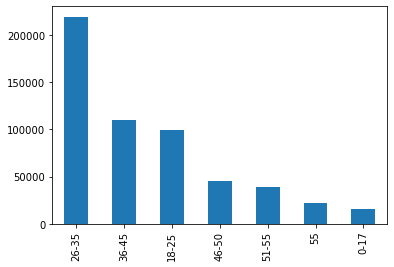

In [23]:
df_train['Age'].value_counts().plot(kind='bar')

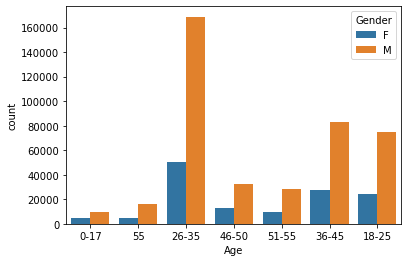

In [24]:
sns.countplot(df_train['Age'],hue=df_train['Gender'])

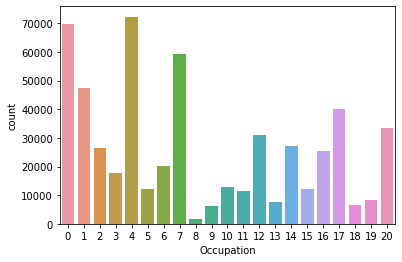

In [25]:
sns.countplot(df_train['Occupation'])

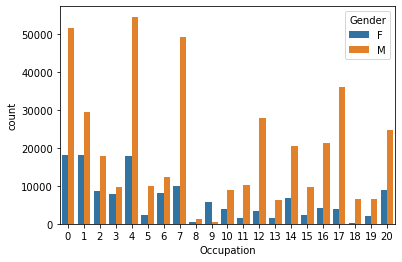

In [26]:
sns.countplot(df_train['Occupation'],hue=df_train['Gender'])

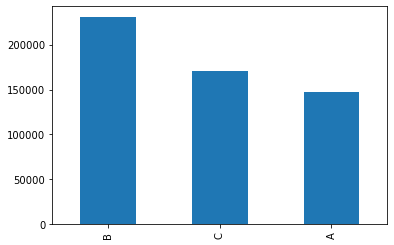

In [27]:
df_train['City_Category'].value_counts().plot(kind='bar')

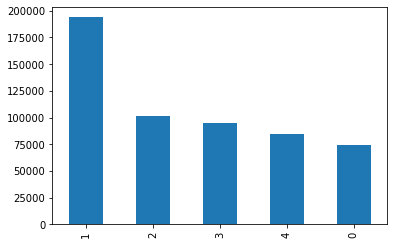

In [28]:
df_train['Stay_In_Current_City_Years'].value_counts().plot(kind='bar')

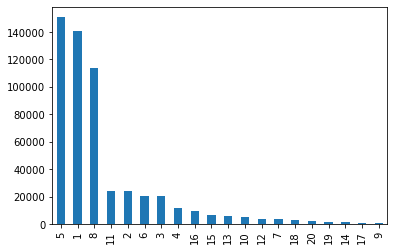

In [29]:
df_train['Product_Category_1'].value_counts().plot(kind='bar')

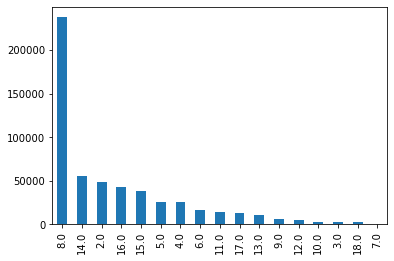

In [30]:
df_train['Product_Category_2'].value_counts().plot(kind='bar')

# Purchase Graphs

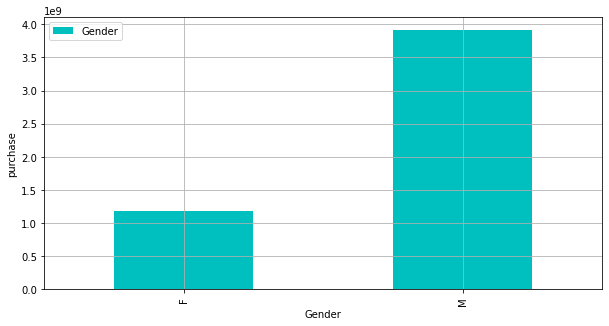

In [31]:
grp=df_train.groupby("Gender")
x1=grp['Purchase'].sum()
x1
df_state= pd.DataFrame({'Gender': x1})

df_state.plot.bar(figsize=(10,5),color=('c'))
plt.ylabel('purchase')
plt.grid(linestyle='-')

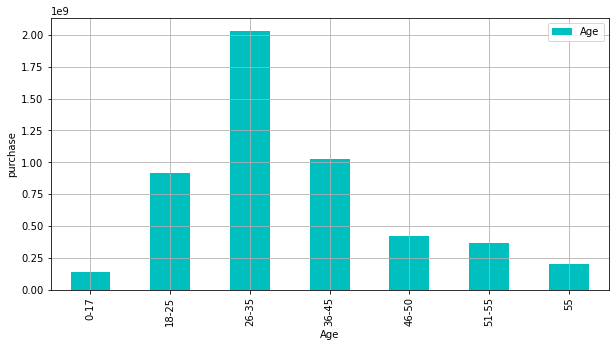

In [32]:
grp=df_train.groupby("Age")
x2=grp['Purchase'].sum()
x2
df_state= pd.DataFrame({'Age': x2})
df_state.plot.bar(figsize=(10,5),color=('c'))
plt.ylabel('purchase')
plt.grid(linestyle='-')

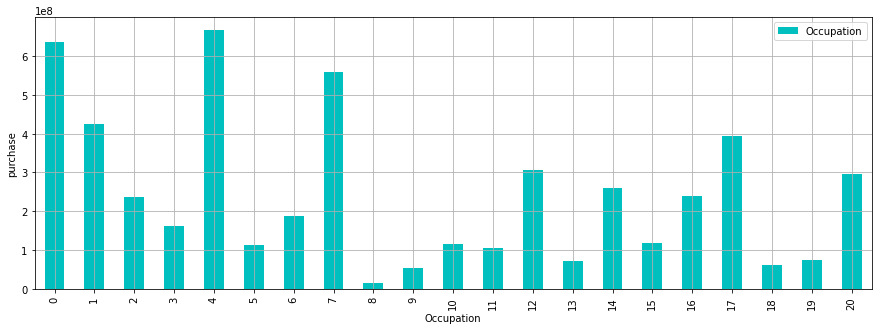

In [33]:
grp=df_train.groupby("Occupation")
x3=grp['Purchase'].sum()
x3
df_state= pd.DataFrame({'Occupation': x3})
df_state.plot.bar(figsize=(15,5),color=('c'))
plt.ylabel('purchase')
plt.grid(linestyle='-')

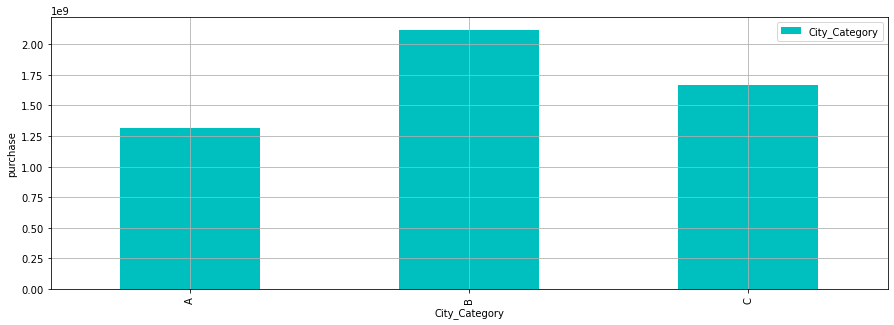

In [34]:
grp=df_train.groupby("City_Category")
x4=grp['Purchase'].sum()
x4
df_state= pd.DataFrame({'City_Category': x4})

df_state.plot.bar(figsize=(15,5),color=('c'))
plt.ylabel('purchase')
plt.grid(linestyle='-')

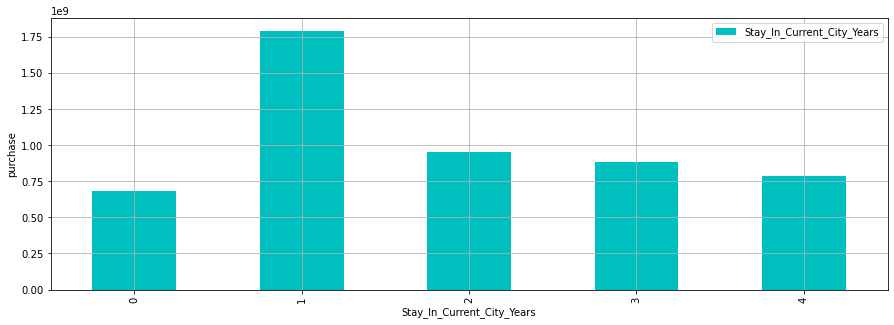

In [35]:
grp=df_train.groupby("Stay_In_Current_City_Years")
x5=grp['Purchase'].sum()
x5
df_state= pd.DataFrame({'Stay_In_Current_City_Years': x5})
df_state.plot.bar(figsize=(15,5),color=('c'))
plt.ylabel('purchase')
plt.grid(linestyle='-')

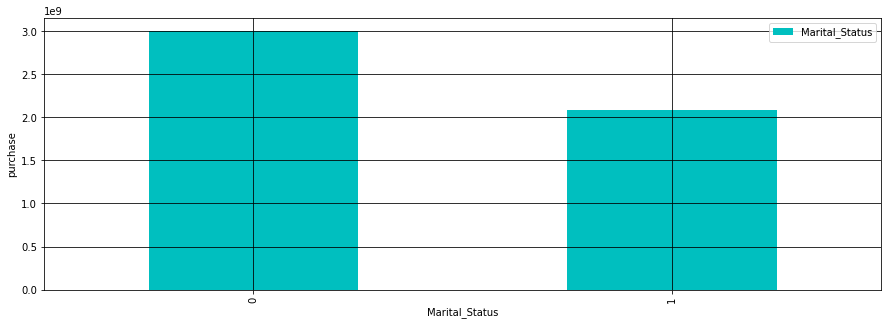

In [36]:
grp=df_train.groupby("Marital_Status")
x6=grp['Purchase'].sum()
x6
df_state= pd.DataFrame({'Marital_Status': x6})

df_state.plot.bar(figsize=(15,5),color=('c'))
plt.ylabel('purchase')
plt.grid(linestyle='-',color='black')

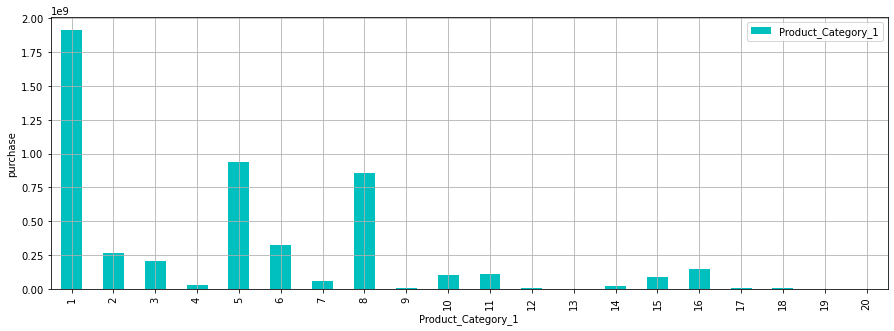

In [37]:
grp=df_train.groupby("Product_Category_1")
x7=grp['Purchase'].sum()
x7
df_state= pd.DataFrame({'Product_Category_1': x7})

df_state.plot.bar(figsize=(15,5),color=('c'))
plt.ylabel('purchase')
plt.grid(linestyle='-')

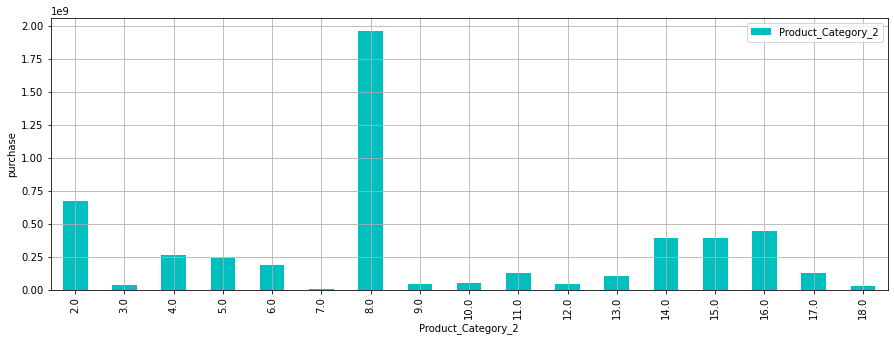

In [38]:
grp=df_train.groupby("Product_Category_2")
x8=grp['Purchase'].sum()
x8
df_state= pd.DataFrame({'Product_Category_2': x8})

df_state.plot.bar(figsize=(15,5),color=('c'))
plt.ylabel('purchase')
plt.grid(linestyle='-')

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 37.8+ MB


# Handling catgorical  value

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
Gender=LabelEncoder()
Age=LabelEncoder()
City_Category=LabelEncoder()

In [42]:
df_train['Gender_n']=Gender.fit_transform(df_train['Gender'])
df_train['Age_n']=Age.fit_transform(df_train['Age'])
df_train['City_Category_n']=City_Category.fit_transform(df_train['City_Category'])

df_test['Gender_n']=Gender.fit_transform(df_test['Gender'])
df_test['Age_n']=Age.fit_transform(df_test['Age'])
df_test['City_Category_n']=City_Category.fit_transform(df_test['City_Category'])

In [43]:
df_train=df_train.drop(["Gender","Age",'City_Category'],axis='columns')
                        
df_test=df_test.drop(["Gender","Age",'City_Category'],axis='columns')                        

In [44]:
df_train=df_train[["Gender_n","Age_n","City_Category_n","Stay_In_Current_City_Years","Occupation","Marital_Status","Product_Category_1","Product_Category_2","Purchase"]]
df_test=df_test[["Gender_n","Age_n","City_Category_n","Stay_In_Current_City_Years","Occupation","Marital_Status","Product_Category_1","Product_Category_2"]]

In [45]:
df_train.head(2)

,Gender_n,Age_n,City_Category_n,Stay_In_Current_City_Years,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,0,0,2,10,0,3,8.0,8370
1,0,0,0,2,10,0,1,6.0,15200


# Correlation Matrix

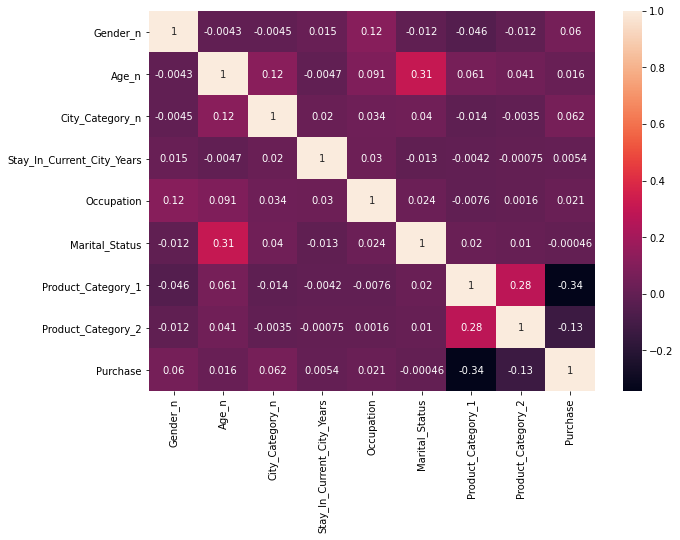

In [46]:
corrMatrix=df_train.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix,annot=True)
plt.show()

In [47]:
df_inputs=df_train.drop(["Purchase"],axis='columns')
df_target=df_train["Purchase"]

In [48]:
df_inputs.head(1)

,Gender_n,Age_n,City_Category_n,Stay_In_Current_City_Years,Occupation,Marital_Status,Product_Category_1,Product_Category_2
0,0,0,0,2,10,0,3,8.0


In [49]:
df_target.head(1)

0    8370
Name: Purchase, dtype: int64

In [50]:
df_train.shape

(550068, 9)

# Model

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_inputs,df_target,test_size=0.2,random_state=10)

In [52]:
from sklearn.ensemble import RandomForestRegressor
model_forest = RandomForestRegressor(random_state=2)
model_forest.fit(X_train,y_train)
model_forest.score(X_test,y_test)

0.6436433600963591

# Predicting for test dataset

In [53]:
p=model_forest.predict(df_test)
print(p)
df_test.shape

[18866.27601667 10257.0362381   8156.38896244 ... 11284.48080195
 18230.264       2169.17990873]


(233599, 8)

In [54]:
df_Answer['Purchase']=p
df_Answer=df_Answer[['Purchase','User_ID','Product_ID']]

In [55]:
#Result dataset
df_Answer.to_csv('Result.csv')
df_Answer.to_csv('Result.csv',index=False)#removing index
df_Answer=pd.read_csv('Result.csv')
df_Answer.head(5)

,Purchase,User_ID,Product_ID
0,18866.276017,1000004,P00128942
1,10257.036238,1000009,P00113442
2,8156.388962,1000010,P00288442
3,2195.375000,1000010,P00145342
4,1755.475146,1000011,P00053842
